In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\HP\Downloads\Copy of Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print(df.head())


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [2]:
# Check the structure
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [31]:
import pandas as pd

# Step 1: Drop columns with more than 50% missing values
threshold = len(df) * 0.5
initial_cols = df.shape[1]
df = df.dropna(thresh=threshold, axis=1)
dropped_cols = initial_cols - df.shape[1]
print(f"- Dropped {dropped_cols} column(s) with >50% missing values.\n")

# Step 2: Fill missing values with median or mode
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f" Cleaning column: {col} | Missing values: {null_count}")
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
            print(f"    Filled with median: {df[col].median()}")
        else:
            try:
                df[col] = df[col].astype(str)
                mode_val = df[col].mode(dropna=True)[0]
                df[col] = df[col].replace("nan", pd.NA)  # Revert string "nan" back to real NaN
                df[col] = df[col].fillna(mode_val)
                print(f"    Filled with mode: {mode_val}")
            except Exception as e:
                print(f"    Could not fill '{col}' due to: {e}")
    else:
        print(f"- Column '{col}' has no missing values.")


- Dropped 0 column(s) with >50% missing values.

- Column 'CustomerID' has no missing values.
- Column 'Count' has no missing values.
- Column 'Country' has no missing values.
- Column 'State' has no missing values.
- Column 'City' has no missing values.
- Column 'Zip Code' has no missing values.
- Column 'Lat Long' has no missing values.
- Column 'Latitude' has no missing values.
- Column 'Longitude' has no missing values.
- Column 'Gender' has no missing values.
- Column 'Senior Citizen' has no missing values.
- Column 'Partner' has no missing values.
- Column 'Dependents' has no missing values.
- Column 'Tenure Months' has no missing values.
- Column 'Phone Service' has no missing values.
- Column 'Multiple Lines' has no missing values.
- Column 'Internet Service' has no missing values.
- Column 'Online Security' has no missing values.
- Column 'Online Backup' has no missing values.
- Column 'Device Protection' has no missing values.
- Column 'Tech Support' has no missing values.
- 

In [30]:
# Display descriptive statistics for all numeric columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%    

In [29]:
# Grouping churn by average monthly charges
churn_monthly_avg = df.groupby('Churn Label')['Monthly Charges'].mean()
print("\nAverage Monthly Charges per Churn Group:")
print(churn_monthly_avg)



Average Monthly Charges per Churn Group:
Churn Label
No     61.265124
Yes    74.441332
Name: Monthly Charges, dtype: float64


In [28]:
# Calculate churn rate distribution
churn_rate = df['Churn Label'].value_counts(normalize=True) * 100
print("\nChurn Rate Breakdown (%):")
print(churn_rate)



Churn Rate Breakdown (%):
Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [27]:
# Extracting top churned segments (optional deep dive)
top_churn = df[df['Churn Label'] == 'Yes'].groupby('Contract')['Monthly Charges'].mean()
print("\n Avg Monthly Charges for Churned Customers by Contract Type:")
print(top_churn)



 Avg Monthly Charges for Churned Customers by Contract Type:
Contract
Month-to-month    73.019396
One year          85.050904
Two year          86.777083
Name: Monthly Charges, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for dark hacker vibes
sns.set(style="darkgrid")


In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'


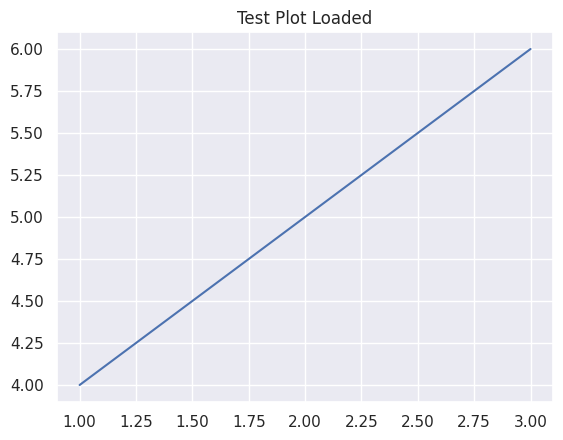

In [20]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot Loaded")
plt.show()


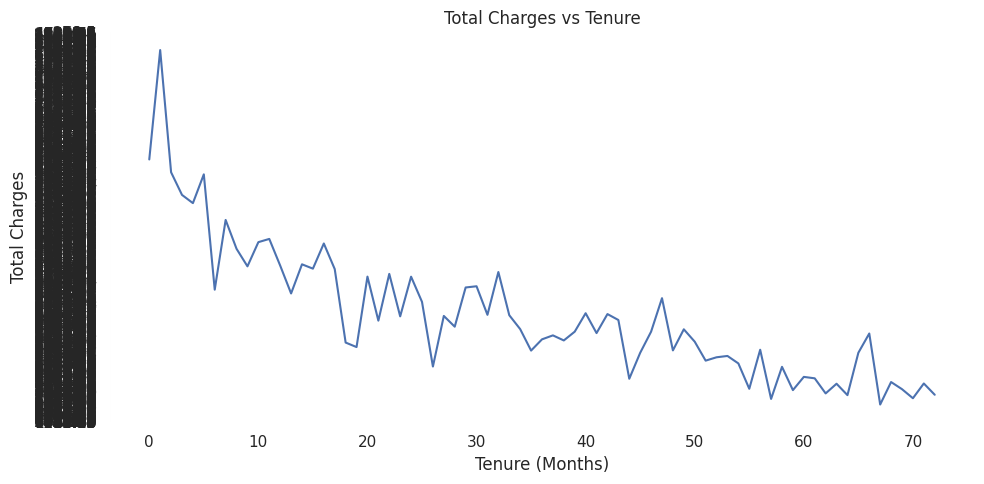

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Tenure Months', y='Total Charges', errorbar=None)
plt.title('Total Charges vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()


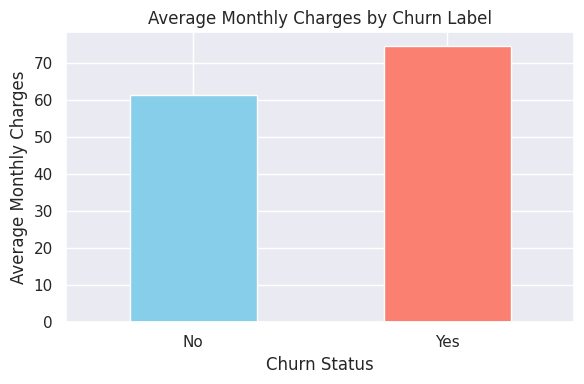

In [24]:
plt.figure(figsize=(6, 4))
df.groupby('Churn Label')['Monthly Charges'].mean().plot(
    kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Monthly Charges by Churn Label')
plt.ylabel('Average Monthly Charges')
plt.xlabel('Churn Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

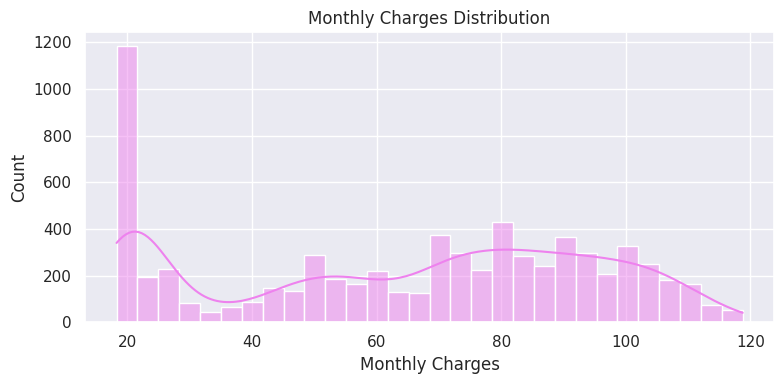

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Monthly Charges'], bins=30, kde=True, color='violet')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


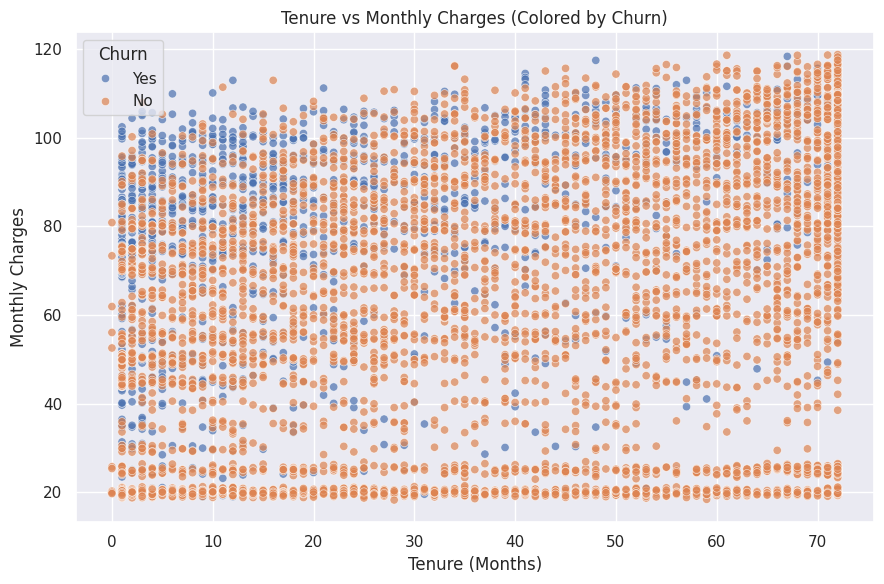

In [26]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Tenure Months', y='Monthly Charges',
                hue='Churn Label', alpha=0.7)
plt.title('Tenure vs Monthly Charges (Colored by Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()
